# Assignment #9: Mock Exam立冬

Updated 1856 GMT+8 Nov 7, 2025

2025 fall, Complied by <mark>胡孝齐 物理学院</mark>



>**说明：**
>
>1. Nov⽉考： AC4<mark>（请改为同学的通过数）</mark> 。考试题⽬都在“题库（包括计概、数算题目）”⾥⾯，按照数字题号能找到，可以重新提交。作业中提交⾃⼰最满意版本的代码和截图。
>
>2. 解题与记录：对于每一个题目，请提供其解题思路（可选），并附上使用Python或C++编写的源代码（确保已在OpenJudge， Codeforces，LeetCode等平台上获得Accepted）。请将这些信息连同显示“Accepted”的截图一起填写到下方的作业模板中。（推荐使用Typora https://typoraio.cn 进行编辑，当然你也可以选择Word。）无论题目是否已通过，请标明每个题目大致花费的时间。
>
>3. 提交安排：提交时，请首先上传PDF格式的文件，并将.md或.doc格式的文件作为附件上传至右侧的“作业评论”区。确保你的Canvas账户有一个清晰可见的本人头像，提交的文件为PDF格式，并且“作业评论”区包含上传的.md或.doc附件。
> 
>4. 延迟提交：如果你预计无法在截止日期前提交作业，请提前告知具体原因。这有助于我们了解情况并可能为你提供适当的延期或其他帮助。  
>
>请按照上述指导认真准备和提交作业，以保证顺利完成课程要求。





## 1. 题目

### M02255: 重建二叉树

http://cs101.openjudge.cn/practice/02255/

思路：
适合采用递归处理，这是由树的定义及性质决定的，后序遍历为左-右-根。
由前序遍历确定根，由中序遍历确定左右子树，然后带入函数进行递归。


代码

```python
def f(preorder,inorder):
    if not preorder or not inorder:
        return ''
    root=preorder[0]
    root_index=inorder.index(root)
    left_inorder=inorder[:root_index]
    right_inorder=inorder[root_index+1:]
    left_preorder=preorder[1:len(left_inorder)+1]
    right_preorder=preorder[len(left_inorder)+1:]
    l=f(left_preorder,left_inorder)
    r=f(right_preorder,right_inorder)
    return l+r+root

try:
    while True:
        line = input().strip()
        preorder, inorder = line.split()
        print(f(preorder, inorder))
except EOFError:
    pass
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
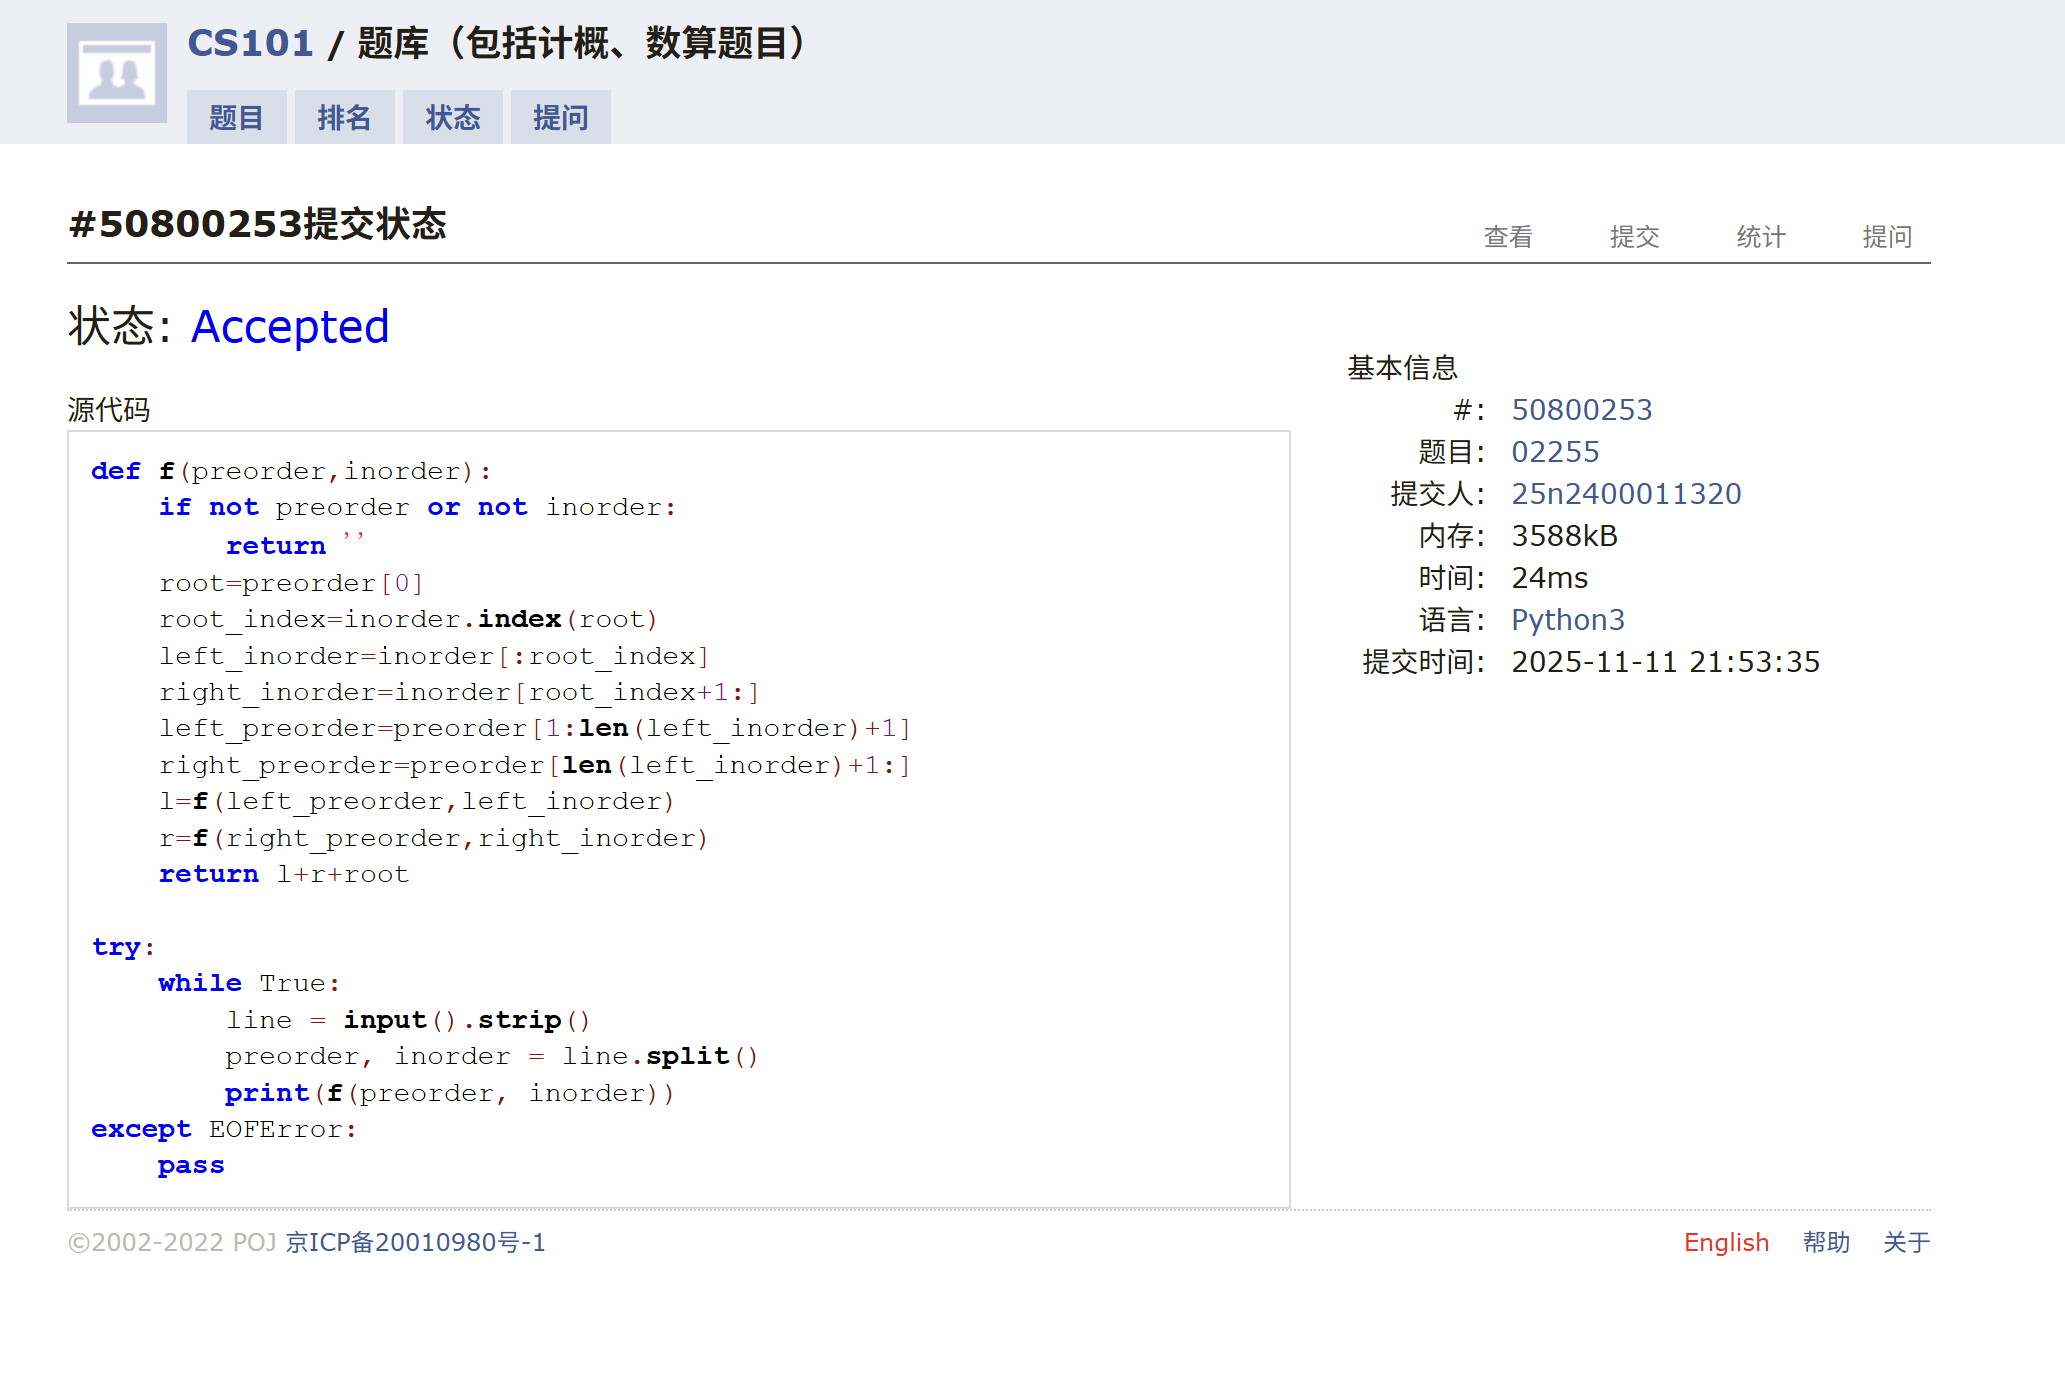




### M02774: 木材加工

http://cs101.openjudge.cn/practice/02774/

思路：
经典二分法


代码

```python
n,k=map(int,input().strip().split())
l=[]
for _ in range(n):
    l.append(int(input().strip()))
i=1
j=max(l)
while i<=j:
    m=(i+j)//2
    num=0
    for a in l:
        num+=a//m
    if num>=k:
        ans=m
        i=m+1
    else:
        j=m-1
if sum(l)<k:
    print(0)
else:
    print(ans)
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
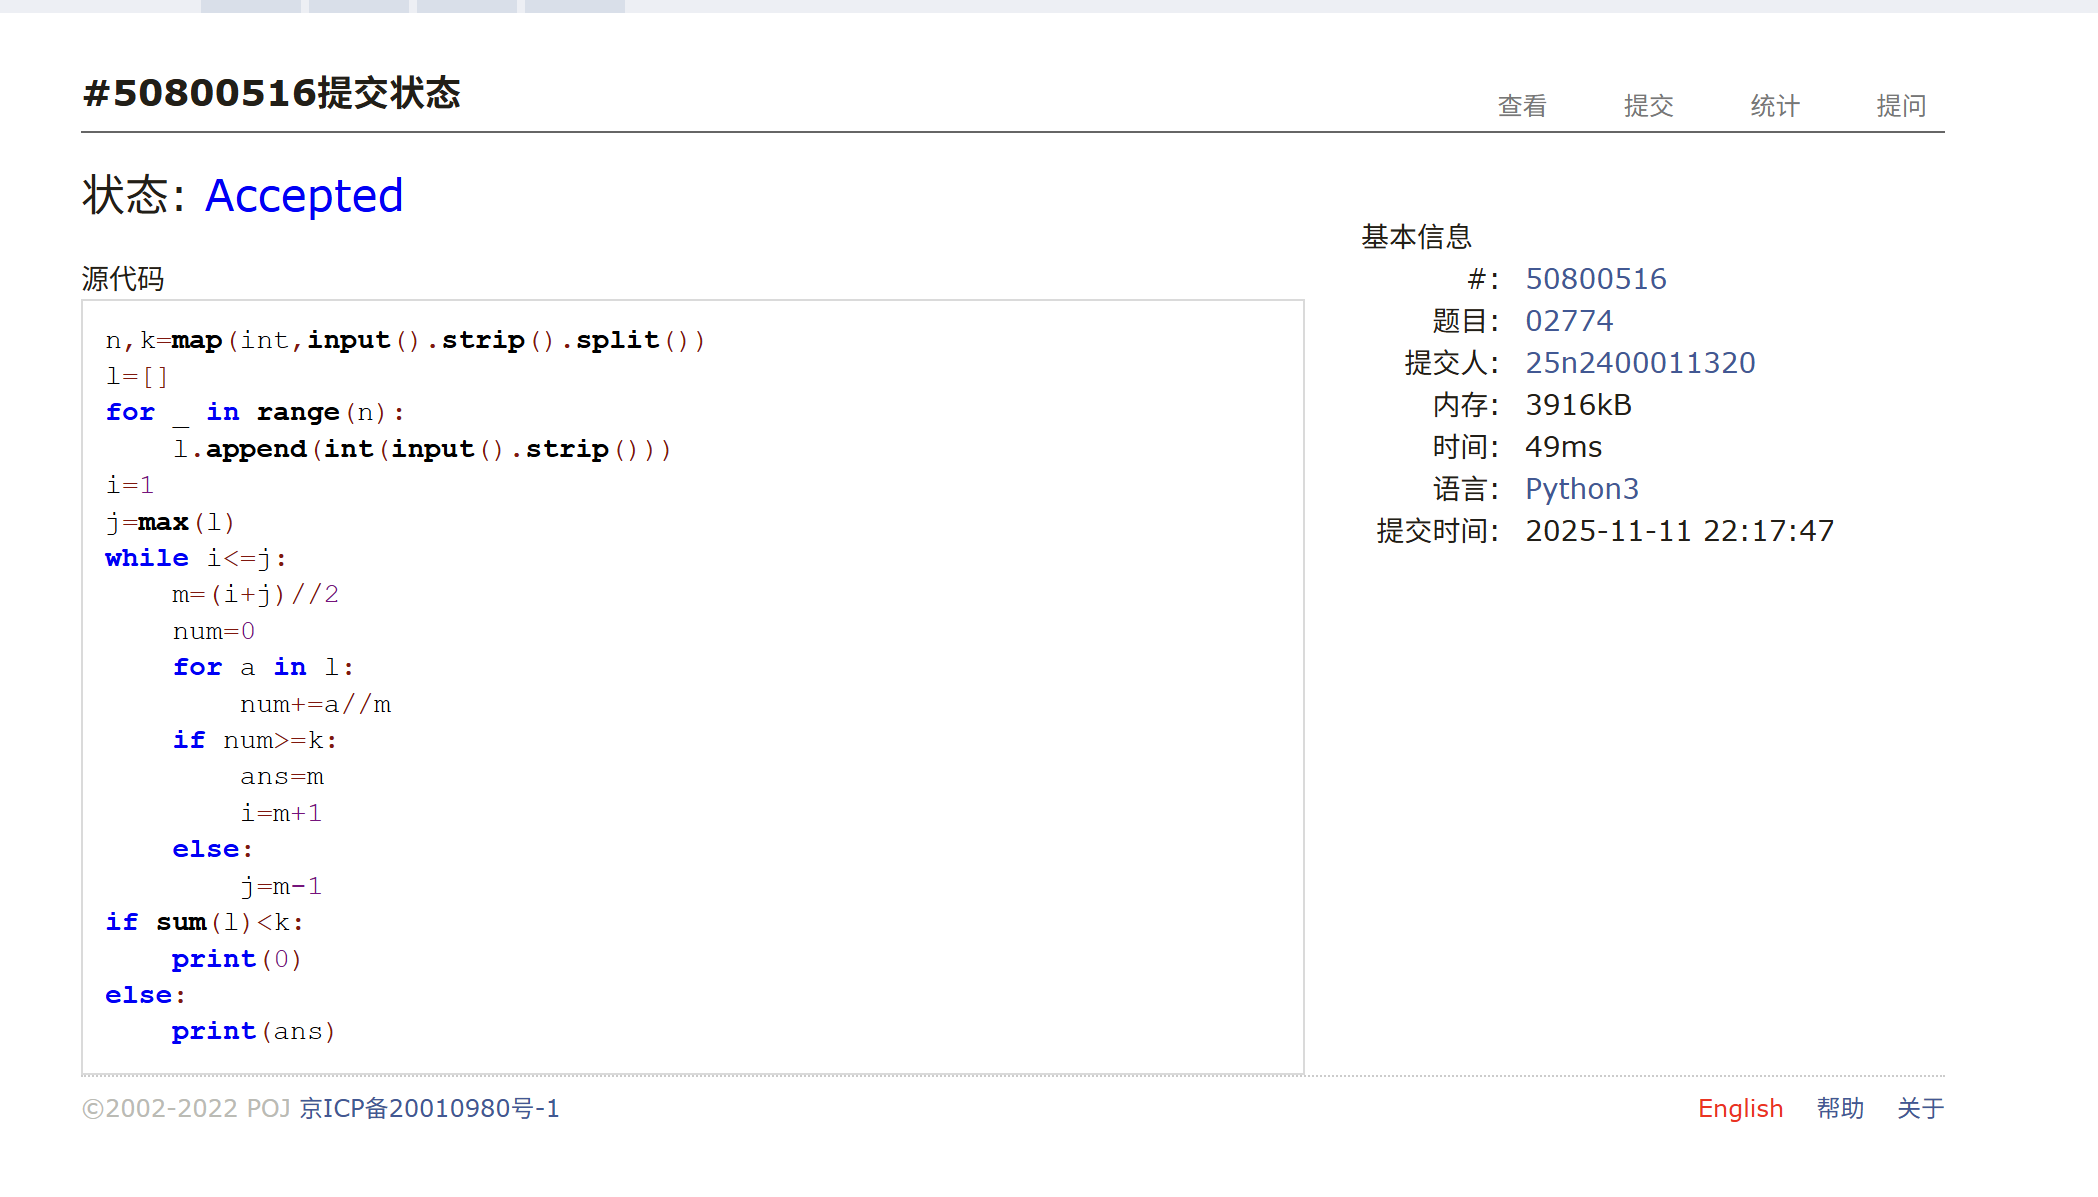




### M02788: 二叉树（2）

http://cs101.openjudge.cn/practice/02788/

思路：
数学题。。。


代码

```python
def f(x):
    i=0
    while True:
        if 2**i-1<x<=2**(i+1)-1:
            return i
        i+=1
while True:
    m,n=map(int,input().strip().split())
    if m==0 and n==0:
        break
    i=f(m)
    j=f(n)
    num=2**(j-i)-1
    front=(m-1-2**i+1)*2**(j-i)
    res=n-2**j+1
    if res<=front:
        pass
    elif front<res<front+2**(j-i):
        num+=res-front
    else:
        num+=2**(j-i)
    print(num)
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
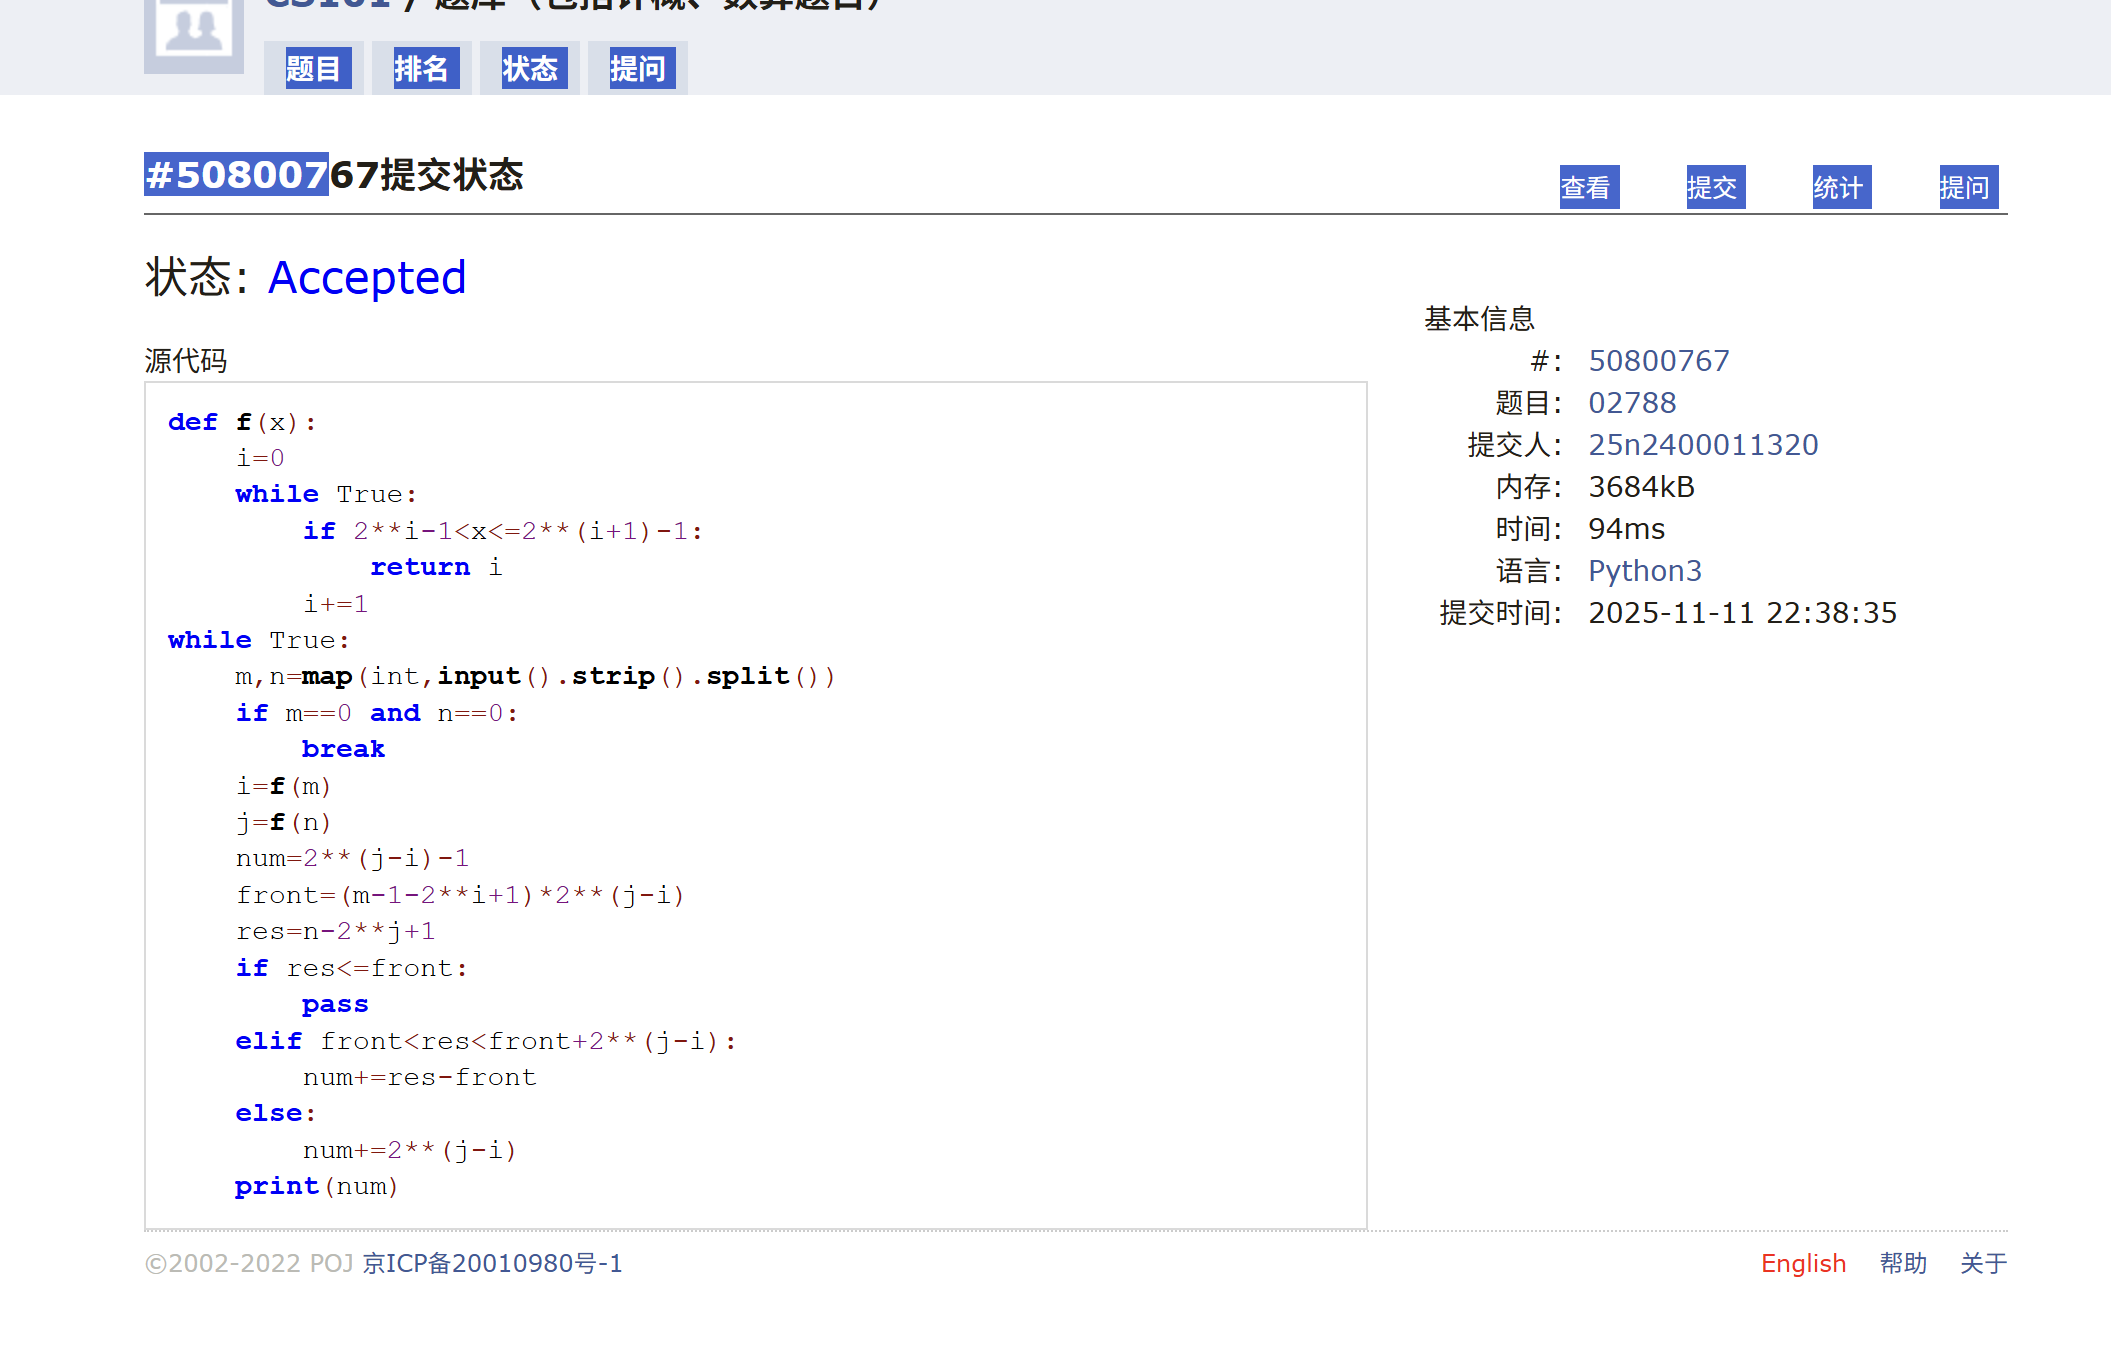




### M04081: 树的转换 

http://cs101.openjudge.cn/practice/04081/


思路：
把相应的树构建出来，然后求深度是最直接的方法


代码

```python
class TreeNode:
    def __init__(self):
        self.left = None
        self.right = None

def build_binary_tree_from_dfs(dfs_str):
    root = TreeNode()
    stack = [root]
    
    for char in dfs_str:
        if char=='d':
            new_node = TreeNode()
            parent = stack[-1]
        
            if parent.left is None:
                parent.left = new_node
            else:
                curr = parent.left
                while curr.right is not None:
                    curr = curr.right
                curr.right = new_node
            
            stack.append(new_node)
        elif char == 'u':
            if stack:
                stack.pop()
    
    return root

def get_original_tree_height(dfs_str):
    max_depth = 0
    current_depth = 0
    
    for char in dfs_str:
        if char == 'd':
            current_depth += 1
            max_depth = max(max_depth, current_depth)
        elif char == 'u':
            current_depth -= 1
            
    return max_depth

def get_converted_tree_height(root):
    if root is None:
        return -1
    left_height = get_converted_tree_height(root.left)
    right_height = get_converted_tree_height(root.right)
    
    return max(left_height, right_height) + 1

dfs_str = input().strip()
original_height = get_original_tree_height(dfs_str)
root = build_binary_tree_from_dfs(dfs_str)
converted_height = get_converted_tree_height(root)
print(f"{original_height} => {converted_height}")
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
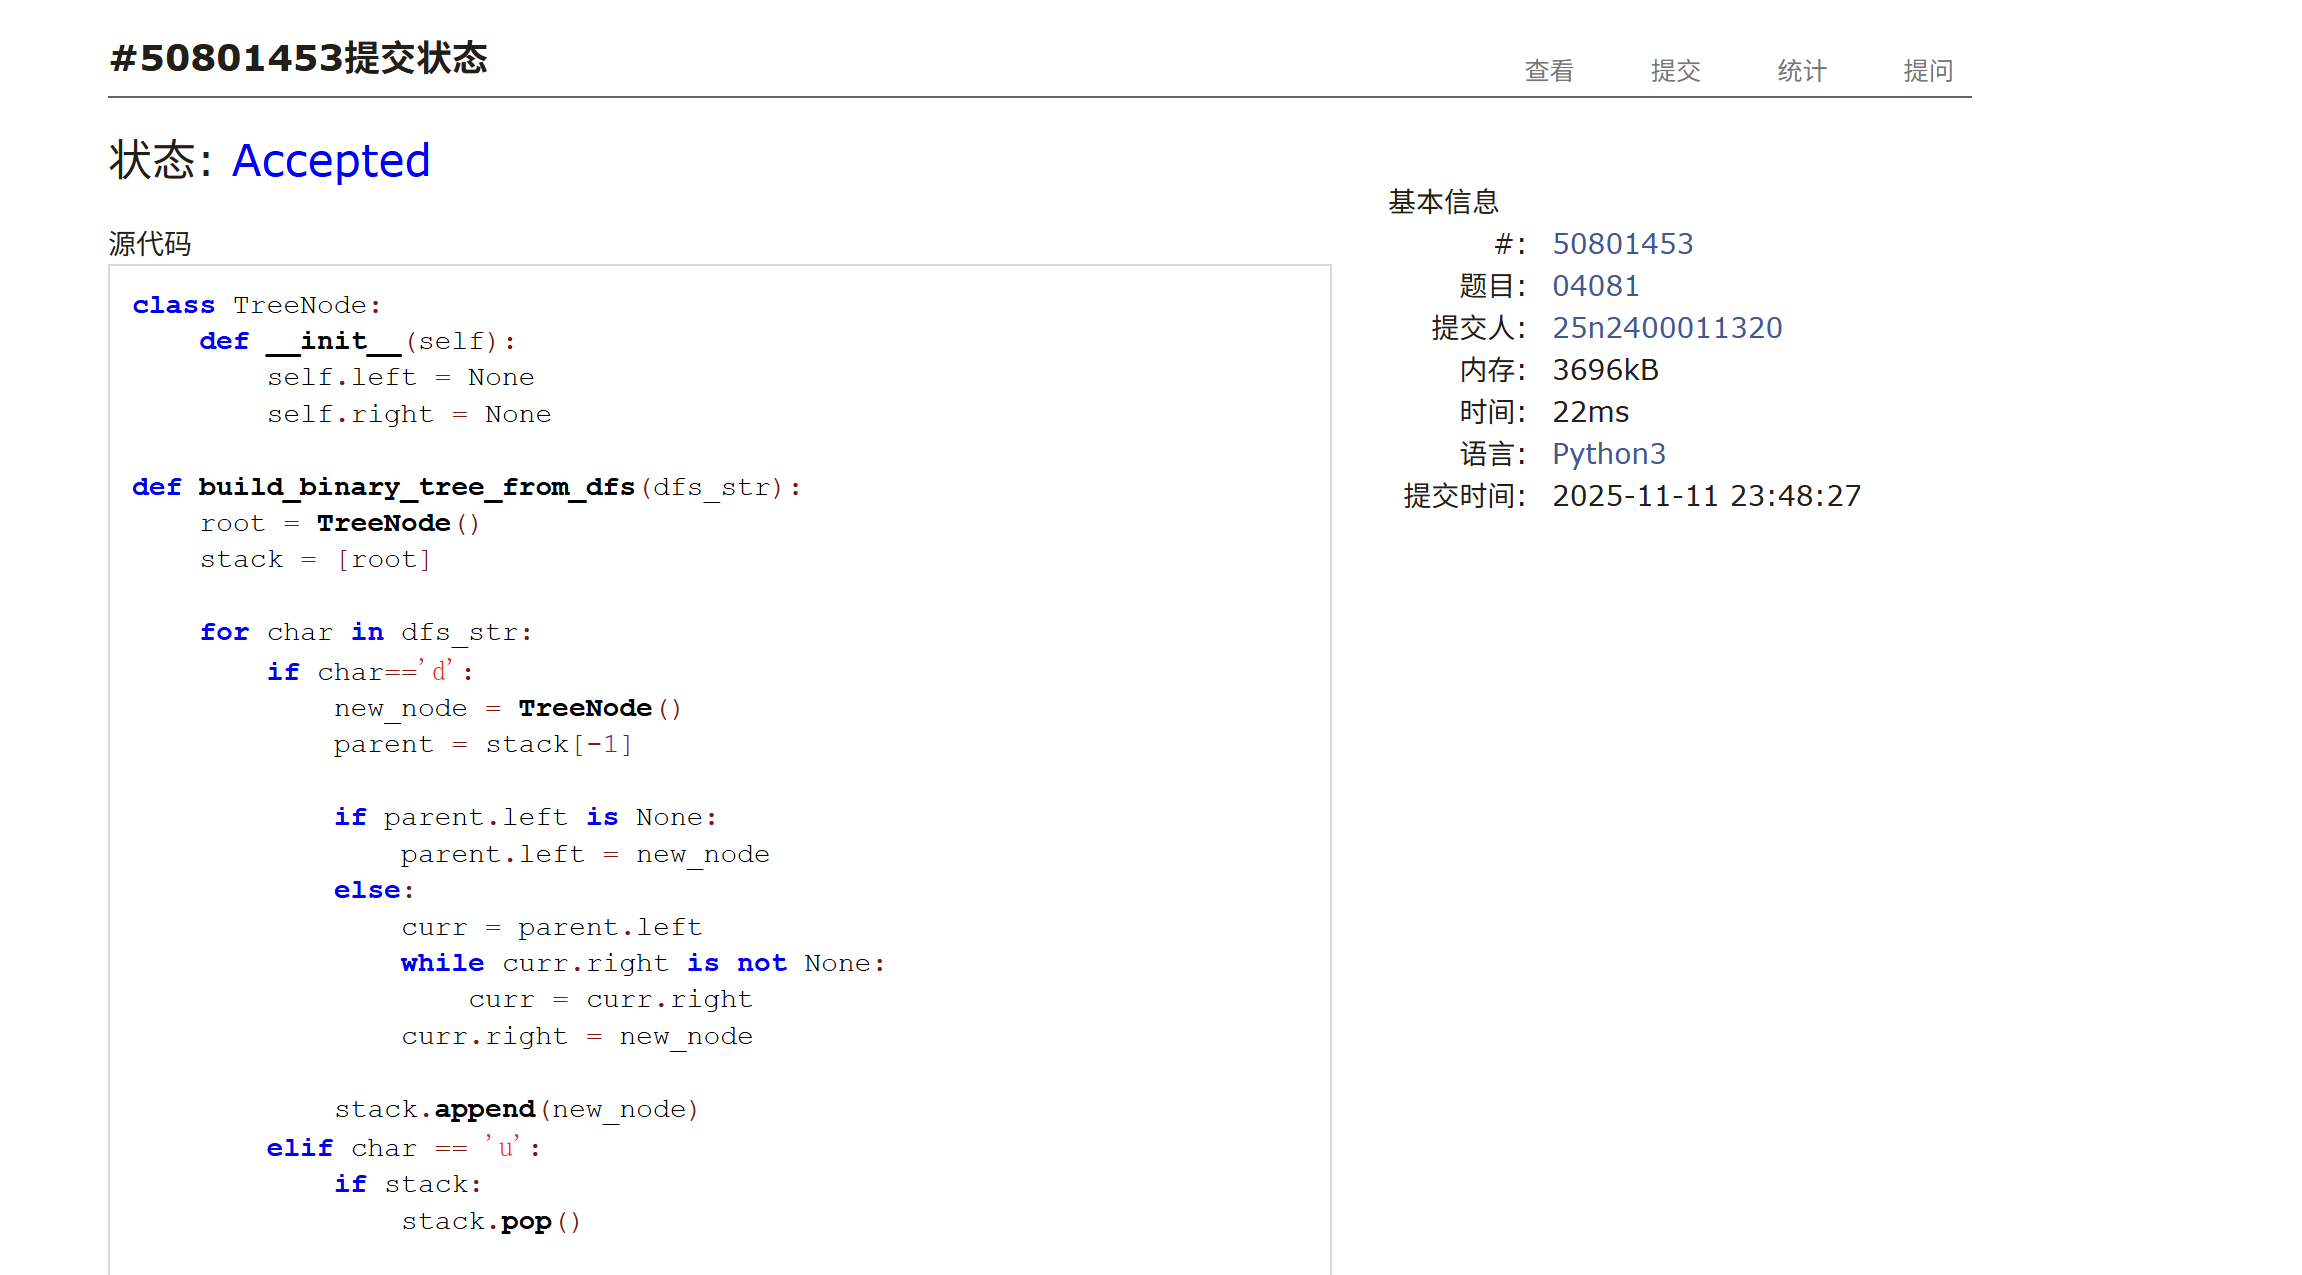




### M04117: 简单的整数划分问题

dfs, dp, http://cs101.openjudge.cn/practice/04117/

思路：
本题使用动态规划，实在没想到怎么做。


代码

```python
MAX_N = 50
dp = [[0] * (MAX_N + 1) for _ in range(MAX_N + 1)]

for j in range(MAX_N + 1):
    dp[0][j] = 1

for i in range(1, MAX_N + 1):
    for j in range(1, MAX_N + 1):
        if j > i:
            dp[i][j] = dp[i][i]
        elif j == i:
            dp[i][j] = dp[i][j-1] + 1
        else:
            dp[i][j] = dp[i-j][j] + dp[i][j-1]


try:
    while True:
        line = input().strip()
        if not line:
            break
        n = int(line)
        print(dp[n][n])
except EOFError:
    pass
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
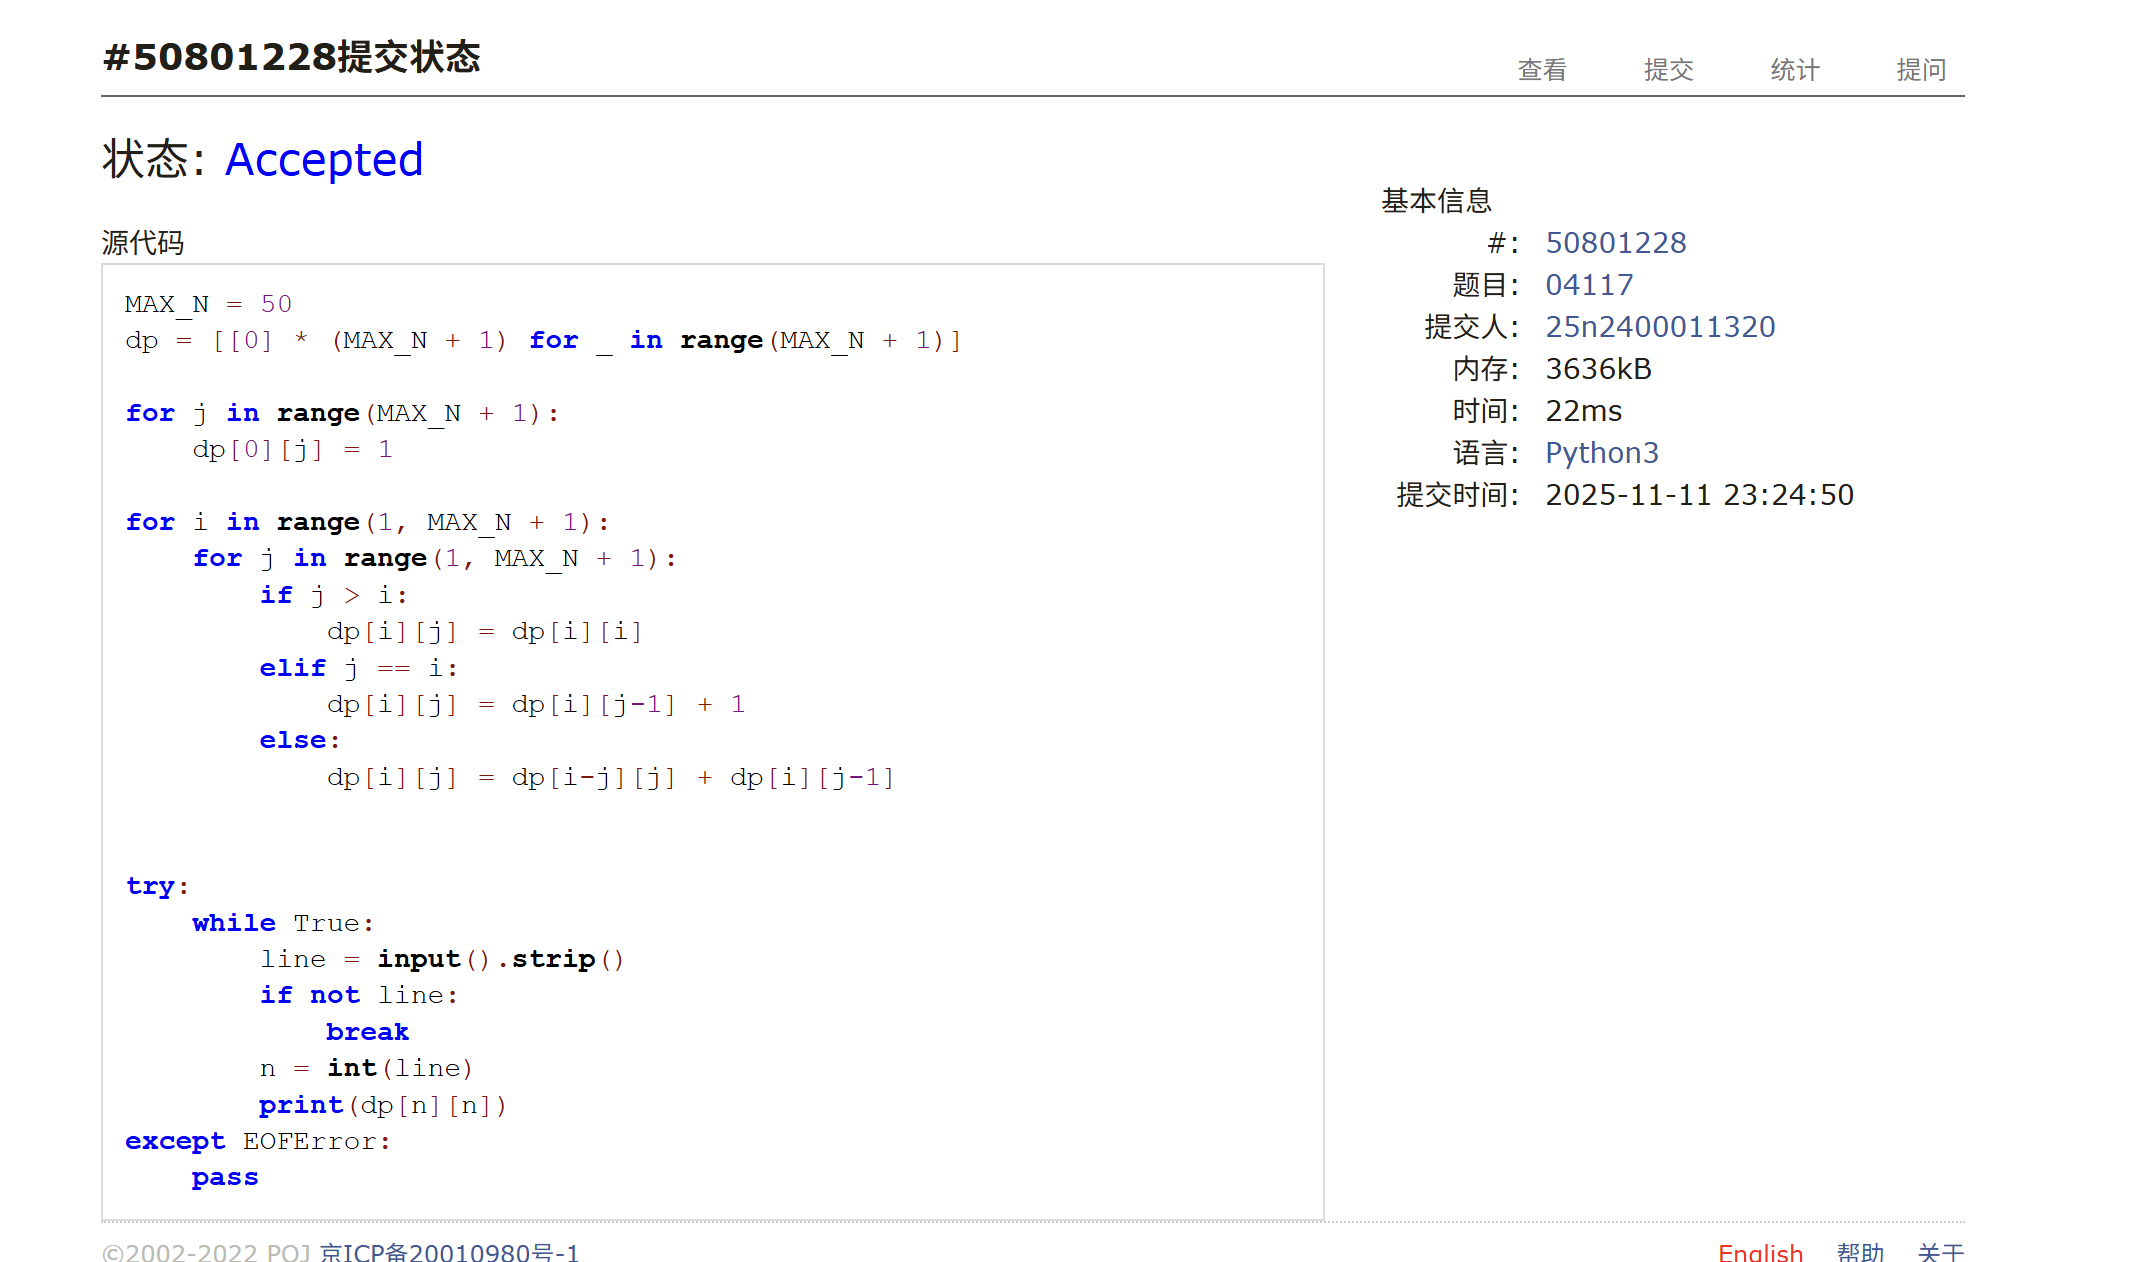




### M04137:最小新整数

monotonous-stack, http://cs101.openjudge.cn/practice/04137/

思路：
当后一个数小于前一个数时，删除，从前到后。最后如果还剩次数，直接从后往前删。


代码

```python
t=int(input().strip())
num=0
def f(n):
    global num
    jud=0
    i=0
    while i<len(n)-1 and num<k:
        if n[i+1]<n[i]:
            jud=1
            del n[i]
            i-=1
            num+=1
        i+=1
    return jud

for _ in range(t):
    n,k=input().strip().split()
    n=list(n)
    k=int(k)
    num=0
    while f(n):
        continue
    if num<k:
        for _ in range(k-num):
            del n[-1]
    s=''
    for a in n:
        s+=a
    print(int(s))
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
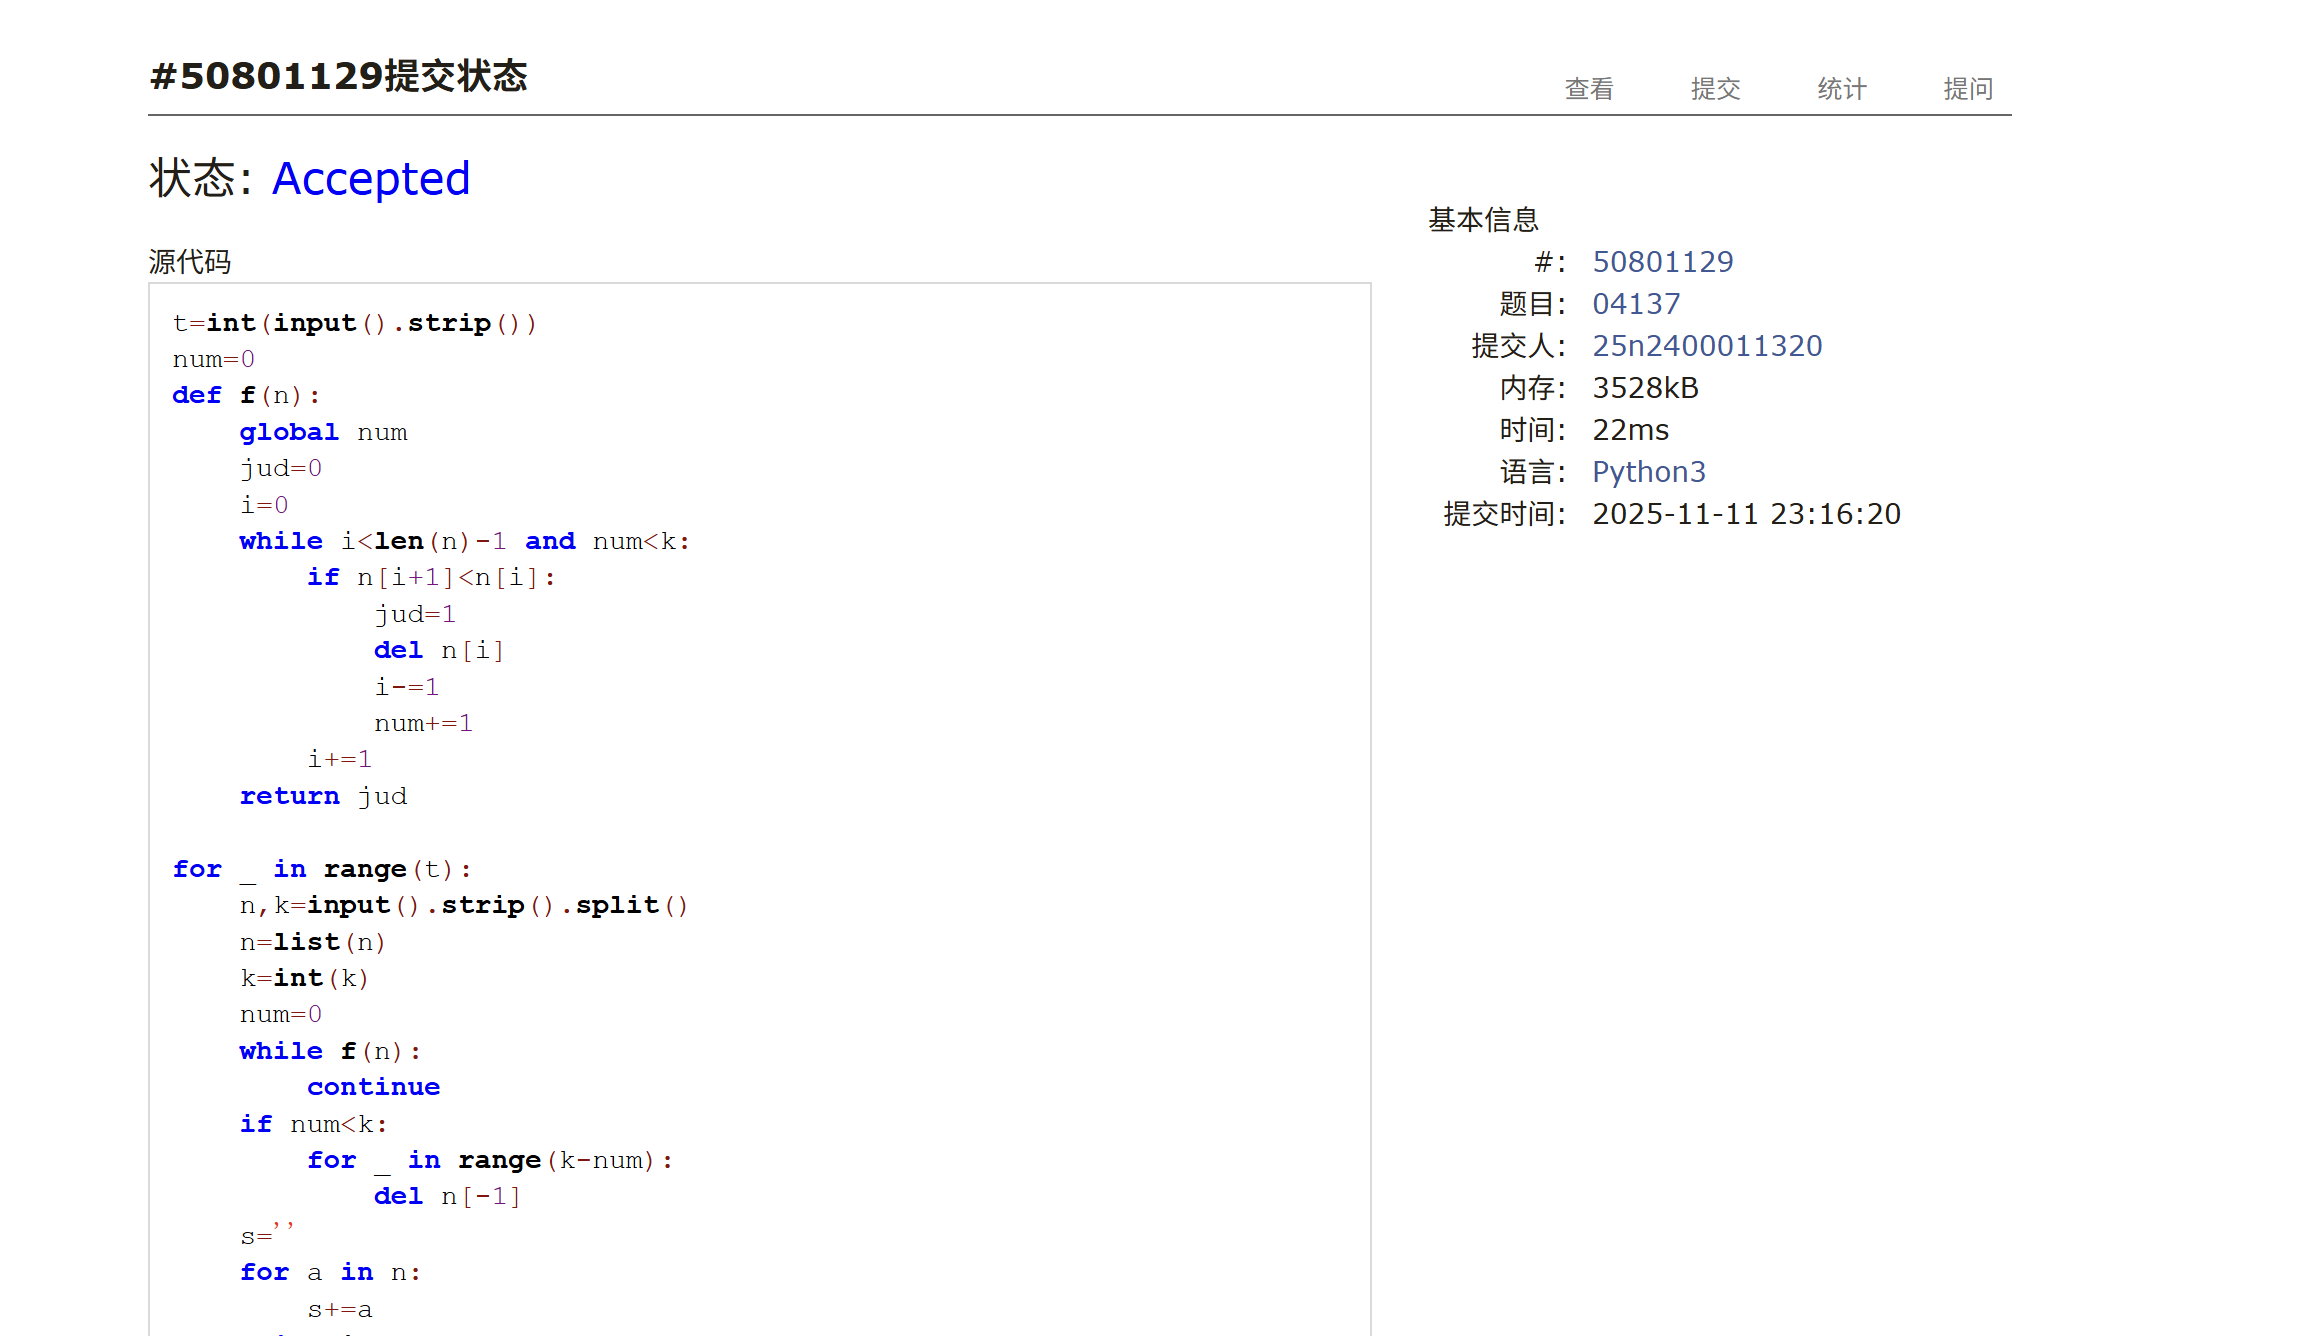




## 2. 学习总结和收获
本周由于其他科目的期末考试，没有额外做什么题，只是熟悉了一下树。





